In [1]:
import numpy as np, matplotlib.pyplot as plt, itertools
from tqdm.notebook import tqdm as log_progress

In [2]:
L, q = 6, 4
N = L * L
q ** N

4722366482869645213696

Фиксируем GS как нулевой. Относительно него,  для каждого из небольшого списка количества перевернутых спинов, считаем энергии. 

In [3]:
def calc_energy(state, N, L):
    E = 0
    for j in range(N):
        column = j // L
        row = j % L
        down = (j + L) % N
        E -= (state[j] == state[down])
        if (row + column) % 2 == 0:
            right = (j + 1) % L + L * column
            E -= (state[j] == state[right])
    return E

In [4]:
d = {}

GS

In [5]:
state = [0 for _ in range(N)]
d[0] = {calc_energy(state, N, L): 1}

One Pin

In [6]:
k = 1
d[k] = {}
for k1, color1 in itertools.product(range(N), [1, 2, 3]):
    state = [0 for _ in range(N)]
    state[k1] = color1
    E = calc_energy(state, N, L)
    try:
        d[k][E] += 1
    except: 
        d[k][E] = 1
d[k]

{-51: 108}

In [7]:
N * (q - 1)

108

Two Pins

In [8]:
k = 2
d[k] = {}
for k1, color1 in itertools.product(range(N), [1, 2, 3]):
    for k2, color2 in itertools.product(range(k1 + 1, N), [1, 2, 3]):
        state = [0 for _ in range(N)]
        state[k1] = color1
        state[k2] = color2

        E = calc_energy(state, N, L)
        try:
            d[k][E] += 1
        except: 
            d[k][E] = 1
d[k]

{-50: 162, -49: 324, -48: 5184}

Third Pins

In [9]:
k = 3
d[k] = {}
for k1, color1 in itertools.product(range(N), [1, 2, 3]):
    for k2, color2 in itertools.product(range(k1 + 1, N), [1, 2, 3]):
        for k3, color3 in itertools.product(range(k2 + 1, N), [1, 2, 3]):
            state = [0 for _ in range(N)]
            state[k1] = color1
            state[k2] = color2
            state[k3] = color3

            E = calc_energy(state, N, L)
            try:
                d[k][E] += 1
            except: 
                d[k][E] = 1
d[k]

{-47: 15876, -49: 324, -48: 1296, -46: 29160, -45: 146124}

Four Pins

In [10]:
k = 4
d[k] = {}
for k1, color1 in itertools.product(range(N), [1, 2, 3]):
    for k2, color2 in itertools.product(range(k1 + 1, N), [1, 2, 3]):
        for k3, color3 in itertools.product(range(k2 + 1, N), [1, 2, 3]):
            for k4, color4 in itertools.product(range(k3 + 1, N), [1, 2, 3]):
                state = [0 for _ in range(N)]
                state[k1] = color1
                state[k2] = color2
                state[k3] = color3
                state[k4] = color4

                E = calc_energy(state, N, L)
                try:
                    d[k][E] += 1
                except: 
                    d[k][E] = 1
d[k]

{-46: 46251,
 -45: 154764,
 -44: 723168,
 -48: 756,
 -47: 4536,
 -43: 1148904,
 -42: 2692926}

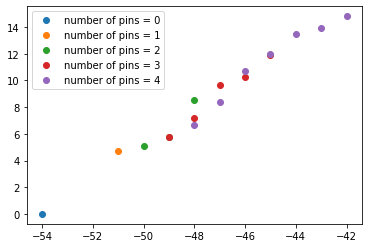

In [11]:
for k in d:
    plt.plot([E for E, G in d[k].items()], [np.log(G) for E, G in d[k].items()], 'o', label = "number of pins = {}".format(k))
plt.legend()
plt.show()

In [15]:
df = {}
for k in d:
    for E in d[k]:
        try:
            df[E] += d[k][E]
        except:
            df[E] = d[k][E]
df

{-54: 1,
 -51: 108,
 -50: 162,
 -49: 648,
 -48: 7236,
 -47: 20412,
 -46: 75411,
 -45: 300888,
 -44: 723168,
 -43: 1148904,
 -42: 2692926}

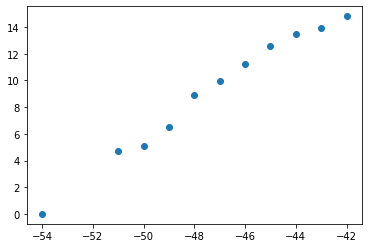

In [16]:
plt.plot([E for E, G in df.items()], [np.log(G) for E, G in df.items()], 'o')
plt.show()

In [21]:
{
    -3 * N / 2: 1,
    -3 * N / 2 + 3: N * (q - 1),
    -3 * N / 2 + 4: 3 * N * (q - 1) / 2
}

{-54.0: 1, -51.0: 108, -50.0: 162.0}

In [23]:
np.log(1.0 * 4**16) / np.log(2)

32.0